#### Revised with holdout group and cross validation 

For Amazon reviews, Number of mislabelled points out of a total 1000 points : 450


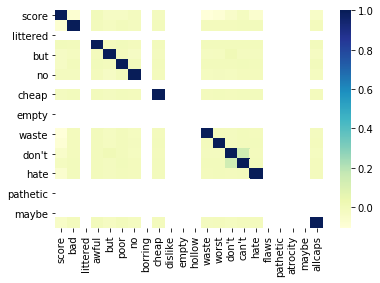

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 

# Classifier from previous assignment 

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)#, delimiter= '\t', header=None)
amazon.columns = ['review', 'score']

keywords = ['bad', 'littered', 'awful', 'but', 'poor', 'no', 'borring', 'cheap', 'dislike'
           , 'empty', 'hollow', 'waste', 'worst', "don't", "can't", 'hate', 'flaws', 'pathetic', 'atrocity', 'maybe']
for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(' ' + str(key) + ' ', case=False)
    
amazon['allcaps'] = amazon.review.str.isupper()

sns.heatmap(amazon.corr(), cmap="YlGnBu")

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

data_A = amazon[keywords + ['allcaps']]
target_A = amazon['score']
bnb.fit(data_A, target_A)
y_pred_amazon = bnb.predict(data_A)

print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data_A.shape[0], (target_A != y_pred_amazon).sum()))



### Evaluation

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_A, y_pred_amazon)

array([[ 88, 412],
       [ 38, 462]], dtype=int64)

In [3]:
print('Accuracy =', (1000-450)*100/1000,'%')
print('Total:', data_A.shape[0])
print('True Negative = 88')
print('True Positive = 462')
print('False Negative = 38')
print('False Positive = 412')
print('Sensitivity=', 462 *100/(462+38),'%')
print('Specificity =', 88 * 100 /(88+412),'%')

Accuracy = 55.0 %
Total: 1000
True Negative = 88
True Positive = 462
False Negative = 38
False Positive = 412
Sensitivity= 92.4 %
Specificity = 17.6 %


In [4]:
# Holdout groups 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_A, target_A, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test))) 
print('Testing on Sample: ' + str(bnb.fit(data_A, target_A).score(data_A, target_A)))

With 20% Holdout: 0.57
Testing on Sample: 0.55


In [5]:
# Cross Validation 
print(sklearn.model_selection.cross_val_score(bnb, data_A, target_A, cv=5))

print('The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting')

[0.54  0.575 0.515 0.55  0.535]
The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting


### Iterating five different versions of the classifier  

<b>Iteration 1. Tune keywords and use pattern matching</b> 

In [6]:
amazon_1 = amazon

In [7]:
keywords_1 = ['bad', 'awful', 'but', 'poor', 'no', 'borring', 'cheap', 'empty', 'hollow', 'waste', 'worst', "can't", 'hate', 'flaws', 'pathetic', 'atrocity', 'maybe']

for key in keywords_1:
    amazon_1[str(key)] = amazon_1.review.str.contains(str(key), case=False)
    
amazon_1['allcaps'] = amazon_1.review.str.isupper()

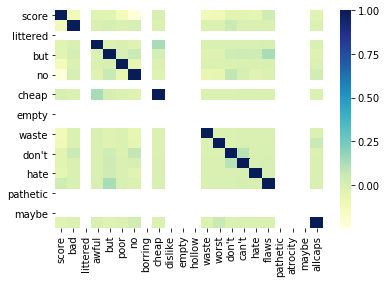

In [8]:
sns.heatmap(amazon_1.corr(), cmap="YlGnBu")

In [9]:
data_1 = amazon_1[keywords + ['allcaps']]
target_1 = amazon_1['score']
bnb.fit(data_1, target_1)
y_pred_amazon_1 = bnb.predict(data_1)

print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data_1.shape[0], (target_1 != y_pred_amazon_1).sum()))


For Amazon reviews, Number of mislabelled points out of a total 1000 points : 337


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_1, y_pred_amazon_1)


array([[223, 277],
       [ 60, 440]], dtype=int64)

In [11]:
print('Accuracy =', (1000-337)*100/1000,'%')
print('Total:', data_1.shape[0])
print('True Negative = 223')
print('True Positive = 440')
print('False Negative = 60')
print('False Positive = 277')
print('Sensitivity=', 440 *100/(440+60),'%')
print('Specificity =', 223 * 100 /(223+277),'%')

Accuracy = 66.3 %
Total: 1000
True Negative = 223
True Positive = 440
False Negative = 60
False Positive = 277
Sensitivity= 88.0 %
Specificity = 44.6 %


In [12]:
# Cross validation
print(sklearn.model_selection.cross_val_score(bnb, data_1, target_1, cv=5))
print('The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting')

[0.69  0.645 0.655 0.605 0.65 ]
The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting


In [13]:
# Holdout groups
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1, target_1, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train_1, y_train_1).score(X_test_1, y_test_1))) 
print('Testing on Sample: ' + str(bnb.fit(data_1, target_1).score(data_1, target_1)))

With 20% Holdout: 0.68
Testing on Sample: 0.663


<b>Iteration 2. More keywords and tuning</b>

In [14]:
amazon_2 = amazon

In [15]:
keywords_2 = ['bad', 'waste', 'but', 'poor', 'none', 'short', 'cheap', 'ever', 'mistake', 'hype', 'worst', 'cannot', 'hate', 'flaws', 'useless', 'lost',
              'only', 'money', 'trash']

for key in keywords_2:
    amazon_2[str(key)] = amazon_2.review.str.contains(' '+ str(key)+ ' ', case=False)
    
amazon_2['allcaps'] = amazon_2.review.str.isupper()

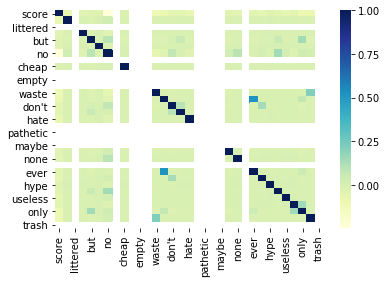

In [16]:
sns.heatmap(amazon_1.corr(), cmap="YlGnBu")

In [17]:
data_2 = amazon_2[keywords + ['allcaps']]
target_2 = amazon_2['score']
bnb.fit(data_2, target_2)
y_pred_amazon_2 = bnb.predict(data_2)

print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data_2.shape[0], (target_2 != y_pred_amazon_2).sum()))


For Amazon reviews, Number of mislabelled points out of a total 1000 points : 370


In [18]:
confusion_matrix(target_2, y_pred_amazon_2)

array([[189, 311],
       [ 59, 441]], dtype=int64)

In [19]:
print('Accuracy =', (1000-370)*100/1000,'%')
print('Total:', data_2.shape[0])
print('True Negative = 189')
print('True Positive = 441')
print('False Negative = 59')
print('False Positive = 311')
print('Sensitivity=', 441 *100/(441+59),'%')
print('Specificity =', 189 * 100 /(189+311),'%')

Accuracy = 63.0 %
Total: 1000
True Negative = 189
True Positive = 441
False Negative = 59
False Positive = 311
Sensitivity= 88.2 %
Specificity = 37.8 %


In [20]:
# Holdout group 
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_2, target_2, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train_2, y_train_2).score(X_test_2, y_test_2))) 
print('Testing on Sample: ' + str(bnb.fit(data_2, target_2).score(data_2, target_2)))



With 20% Holdout: 0.64
Testing on Sample: 0.63


In [21]:
# Cross validation
print(sklearn.model_selection.cross_val_score(bnb, data_2, target_2, cv=5))
print('The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting')

[0.625 0.595 0.605 0.61  0.65 ]
The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting


<b>Iteration 3. Remove a feature</b> 

In [22]:
# remove the all caps feature and use the original array of keywords
amazon_3 = amazon 
data_3 = amazon_3[keywords]
target_3 = amazon_3['score']
bnb.fit(data_3, target_3)
y_pred_amazon_3 = bnb.predict(data_3)

print('For Amazon reviews, Number of mislabelled points out of a total {} points : {}'.format(data_3.shape[0], (target_3 != y_pred_amazon_3).sum()))


For Amazon reviews, Number of mislabelled points out of a total 1000 points : 371


In [23]:
confusion_matrix(target_3, y_pred_amazon_3)

array([[183, 317],
       [ 54, 446]], dtype=int64)

In [24]:
print('Accuracy =', (1000-371)*100/1000,'%')
print('Total:', data_3.shape[0])
print('True Negative = 183')
print('True Positive = 446')
print('False Negative = 54')
print('False Positive = 317')
print('Sensitivity=', 446 *100/(446+54),'%')
print('Specificity =', 183 * 100 /(183+317),'%')

Accuracy = 62.9 %
Total: 1000
True Negative = 183
True Positive = 446
False Negative = 54
False Positive = 317
Sensitivity= 89.2 %
Specificity = 36.6 %


In [25]:
# Holdout group
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_3, target_3, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train_3, y_train_3).score(X_test_3, y_test_3))) 
print('Testing on Sample: ' + str(bnb.fit(data_3, target_3).score(data_3, target_3)))


With 20% Holdout: 0.63
Testing on Sample: 0.629


In [26]:
# Cross validation 
print(sklearn.model_selection.cross_val_score(bnb, data_3, target_3, cv=5))
print('The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting')

[0.62  0.595 0.61  0.615 0.65 ]
The scores seem consistent with little fluctuation suggesting that it is less likely that the model is overfitting


There is little fluctuation in the cross validation scores suggesting that there is less probability of overfitting.  

The first itteration of classifiers seem to perform better with a relatively high accuracy, sensitivity, and specificity. This is due to pattern matching in the keyworks used instead of word match. Over all the keywords feature is most impactful. 